In [1]:
%%HTML
<style>
.container { width:100% }
</style>

In [2]:
%run othello_game.ipynb
%run othello_ai.ipynb

In [3]:
import ipywidgets


num_poss_moves = []


def play_game(settings):
    state = GameState()
    next_move_blind(state, settings)
    return count_disks(state, BLACK), count_disks(state, WHITE)


def next_move_blind(state, settings):
    global num_poss_moves
    num_poss_moves.append((state.num_pieces, len(state.possible_moves), len(get_possible_moves(state, -state.turn))))
    settings[state.turn]['mode'](settings[state.turn]['algorithm'], state, settings[state.turn]['depth'], settings[state.turn]['heuristic'])
    if not state.game_over:
        next_move_blind(state, settings)

In [4]:
settings = { BLACK: { 'heuristic': combined_heuristic,
                      'algorithm': random_ai,
                      'depth': 1,
                      'mode': ai_make_move },
             WHITE: { 'heuristic': combined_heuristic,
                      'algorithm': random_ai,
                      'depth': 1,
                      'mode': ai_make_move }}

for i in range(50):
    play_game(settings)

['1', 'x1', 'x1^2']


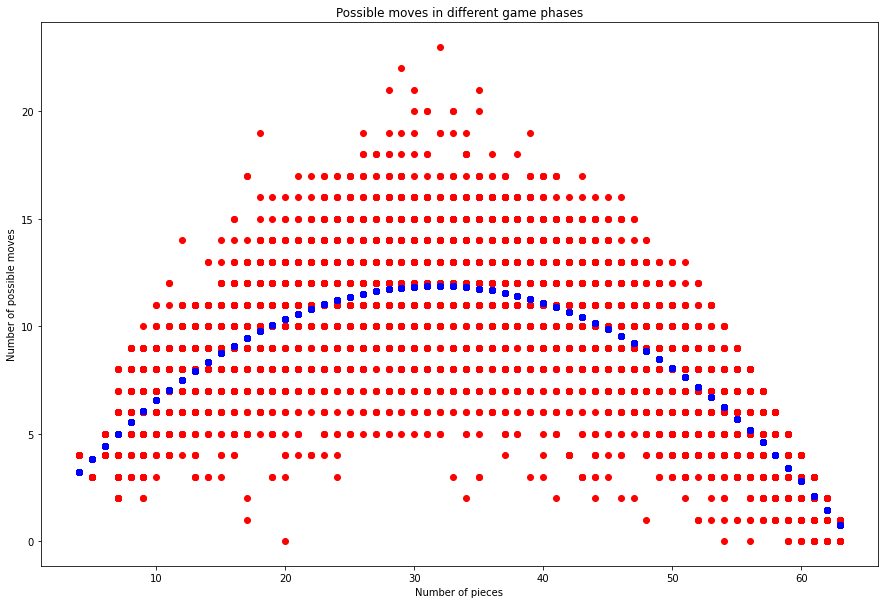

-0.011336470827524314 *x**2 + 0.7178166377823245 * x + 0.0 + 0.5165750863536918


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn.linear_model as lm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = []
y = []

for (pieces, a, b) in num_poss_moves:
    x.append(pieces)
    y.append(a)
    x.append(pieces)
    y.append(b)

X = np.reshape(x, (len(x), 1))
y = np.reshape(y, (len(y), 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
print(poly_reg.get_feature_names(['x1', 'x2']))
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

def print_graph():
    plt.figure(figsize=(15, 10))
    plt.scatter(X, y, color='red')
    plt.scatter(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Possible moves in different game phases')
    plt.xlabel('Number of pieces')
    plt.ylabel('Number of possible moves')
    plt.show()

print_graph()
print(pol_reg.coef_[0][2],"*x**2 +",pol_reg.coef_[0][1],"* x +",pol_reg.coef_[0][0],"+",pol_reg.intercept_[0])